# Variables Research (Part I - Sales Manganese)
### `Misael Ramirez - A00821781`

<img src="autlan-logo.png" alt="Autlan logo">

In this notebook, we will perform a research for a financial forecast of variables which driver is directly related with sales. Sales are divided in the following:
1. *Mining-Metallurgical Manganese Products*
2. *Energy*
3. *Precious Metals*

Nonetheless, the contribution of the **energy** division is technically none, since the resources related with energy are used in the mines possesed by Autlán to perform the extraction of minerals, manganese for the most part. As stated in 2Q14 report: 
> "The electricity generation of the Atexcaco hydroelectric plant was favored by the constant flow of water during the dry months, so its generation grew 56%, contributing 30% of Autlán's needs and representing savings in the first half of the year of 40.2 million MXN"

**Source:** Autlan

In [41]:
# import required libraries 
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# setting up plots
sns.set_style(  
    "darkgrid",  
    {  
        'legend.frameon': True,  
    }  
)
mpl.rc('figure', figsize=(14, 8))

## General Sales Overview

Revenue shows a clear decreae the first 3 years of analysis, while after FY17 (the best second year in the history of the company) the trend has been quite positive, despite the political uncertainty and volatile benchmark prices in FY19. Although it is clear that the intensity of the sales growth has been getting steeper after FY19.

> We realize the big impact that net sales has on the overall performance of Autlán

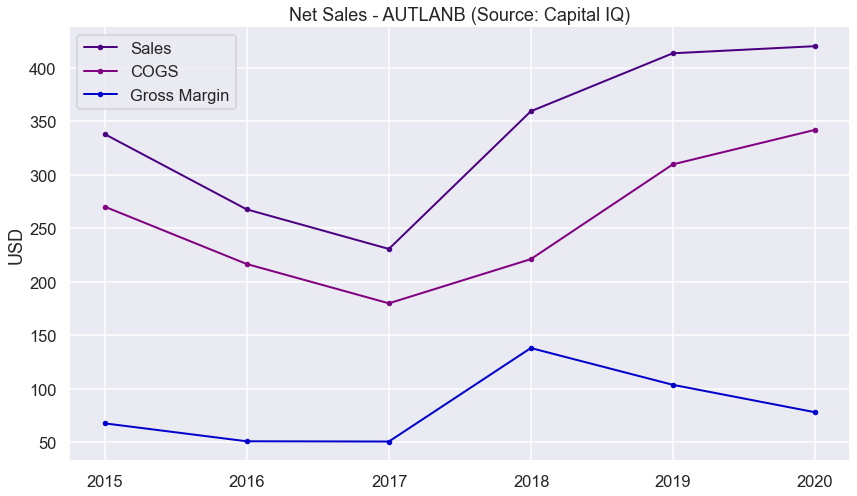

In [42]:
net_sales = pd.read_excel('vars_mn.xlsx', sheet_name='Net Sales', parse_dates=['Year'])

sns.set_context("talk")
plt.plot(net_sales['Year'], net_sales['Net Sales'], color='indigo', marker='.', linewidth=2)
plt.plot(net_sales['Year'], net_sales['COGS'], color='purple', marker='.', linewidth=2)
plt.plot(net_sales['Year'], net_sales['Gross Margin'], color='mediumblue', marker='.', linewidth=2)

plt.legend(['Sales', 'COGS', 'Gross Margin'])
plt.title('Net Sales - AUTLANB (Source: Capital IQ)')
plt.ylabel('USD')

plt.show()

# Manganese Sales Division (DIV1)
This section represents most of Autlán's revenue which is currently 83% (**Source:** Bloomberg). The sub-variables that might affect the revenue of the company in this divisions might be the following:

1. *Manganese average spot price*
2. *Silicomanganese futures*
3. *Ferroalloys average spot price*
3. *Global steel production*
4. *Currency exchange of USDCNH*
5. *Currency exchange of USDMXN*

## (1) M4CNTSWC AMTL Index (Manganese Average Spot Price)
This is considered one of the most accurate indexes when it comes to the spot price of manganese: **China Manganese Ore Gabonese 44% (Comilog) in Tianjin Port**. The data's frequency is monthly starting at the last month of 2014, the other data will share the same period and frequency (**Source:** Bloomberg). From this graph, we can infer the following:
* The second best year of Autlán in history (FY17) is highly correlated with the record high of this index also located before FY17 but which showed a stable recovery, which resulted in stable earnings during the entire year
* The bad years of FY15 and FY16 are related with the low swing in the index

This represents how infuential are macroeconomic factors in the mining industry and Autlán's operations as a whole. Macroeconomic factors seem to have a highly influence in the industry and the company.

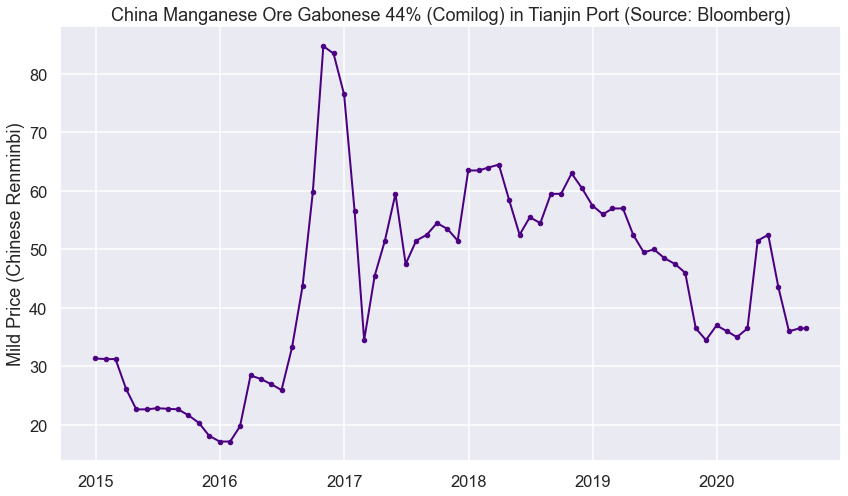

In [43]:
mang_ix = pd.read_excel('vars_mn.xlsx', parse_dates=['Date'], sheet_name='Manganese')

sns.set_context("talk")
plt.plot(mang_ix['Date'],mang_ix['Mid Price'], c='indigo', marker='.', linewidth=2)
plt.title('China Manganese Ore Gabonese 44% (Comilog) in Tianjin Port (Source: Bloomberg)')
plt.ylabel('Mild Price (Chinese Renminbi)')

plt.show()

## (2) IISTTOTL Index (Global Steel Production)
Manganese is one of the most important components when it comes to steelmaking (also ferroalloy which at the same time contains manganese, that is why it is considered as well). Due to manganese, Autlán is considered a *Steel Raw Supplier* (**Source:** Bloomberg).

The production of steel has a cyclical movement which dynamic is repeated each year and overall it seems reflective of overall market conditions; its general tendency (demand) increases during economic booms and plummets during global recessions but the cycle remains almost intact as new projects of businesses and constructions come up as each new year begins. Although, considering that steel is used globally at a large scale for a wide prodcuts, this makes a lot of sense. The economic slowdown during FY20 due to the pandemic is very clear although it has shown recovery. As a result, we can infer tha the operations of Autlan rely on a stable or growing overall economy, which is why the acquisition of Metallorum was essential in order to hedge from anticyclical periods and perhaps not only rely on derivatives investments.

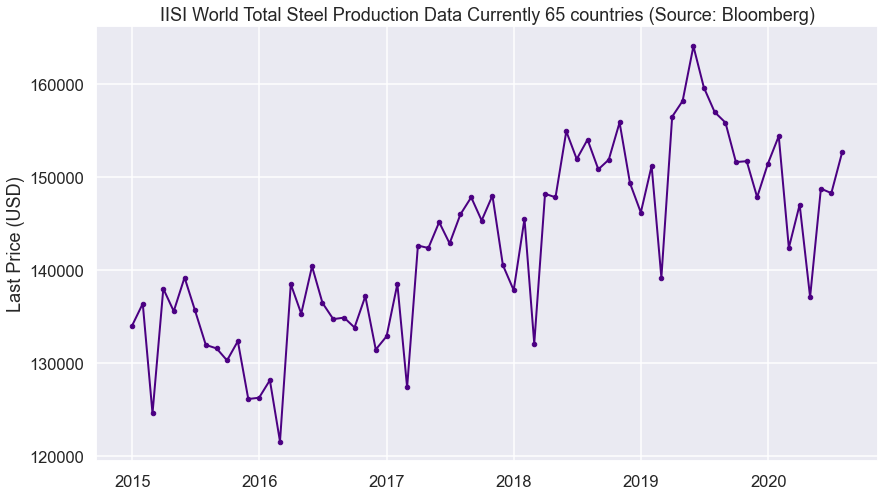

In [44]:
steel_ix = pd.read_excel('vars_mn.xlsx', parse_dates=['Date'], sheet_name='Steel')

sns.set_context("talk")
plt.plot(steel_ix['Date'],steel_ix['Last Price'], c='indigo', marker='.',linewidth=2)
plt.title('IISI World Total Steel Production Data Currently 65 countries (Source: Bloomberg)')
plt.ylabel('Last Price (USD)')

plt.show()

## (3) USDMXN (Exchange gain/loss)

We consider this is an import factor since after 2014, Autlán changed the currency of its financial statements to USD because most of its operations were directly related with this currency (North America).

* During 2017, there was a depreciation of MXN, which caused an exchange gain when it comes ot the revenue, since their operations are natively in MXN. Shortly, when it comes to sales, you actually made less pesos per dollar.
* Currently at 2020, the company incurred in an exchange loss as also mentioned in the 2Q20 report, due to the appreciation of MXN. Shortly, when it comes to sales, you made more pesos per dollar. Let's keep in mind that the financial statements are now in USD

**Source:** Autlan

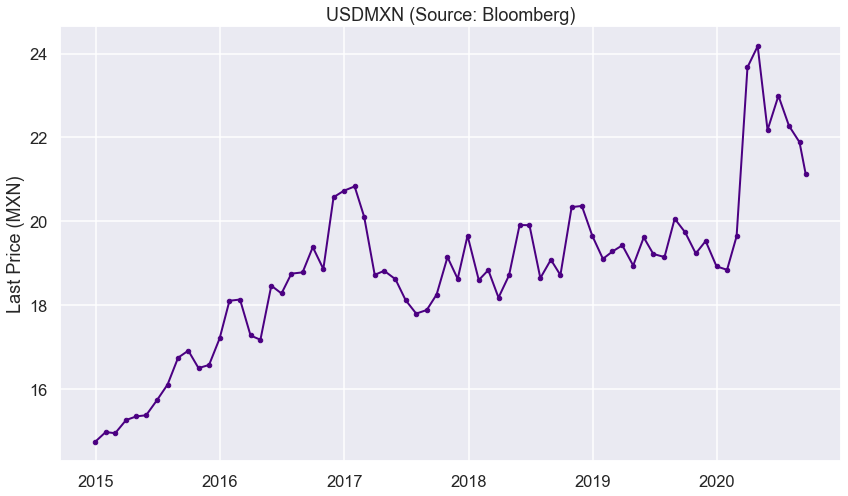

In [45]:
usdmxn = pd.read_excel('vars_mn.xlsx', parse_dates=['Date'], sheet_name='USDMXN')

sns.set_context("talk")
plt.plot(usdmxn['Date'],usdmxn['Last Price'], c='indigo', marker='.', linewidth=2)
plt.title('USDMXN (Source: Bloomberg)')
plt.ylabel('Last Price (MXN)')

plt.show()

## (4) IMR1 Comdty (Silicon Manganese Futures)

It has been stated many times by Autlan in reports that the derivatives of silicon manganese from Zhengzhou Commodity Exchange have a huge impact in the current spot prices because it represents what it is expected to be the actual *future* price. We expect that the correlation between futures and spot prices is higher than any other sub-variables we are actually considering. We use the **Zhengzhou Commodity Exchange Silicon Manganese Generic Futures** (**Source:** Bloomberg). The movement of the future contract is generally similar to the spot price overtime. Nonetheless, it is important to consider that the influence of derivatives changes depending on the economic uncertainty:

>"On the basis of conceptual and theoretical arguments that spot and futures prices for metals and other commodities should be closely correlated during periods of strong contango and much less correlated during periods of backwardation or weak contango"

*(Tilton et al., 2011)*

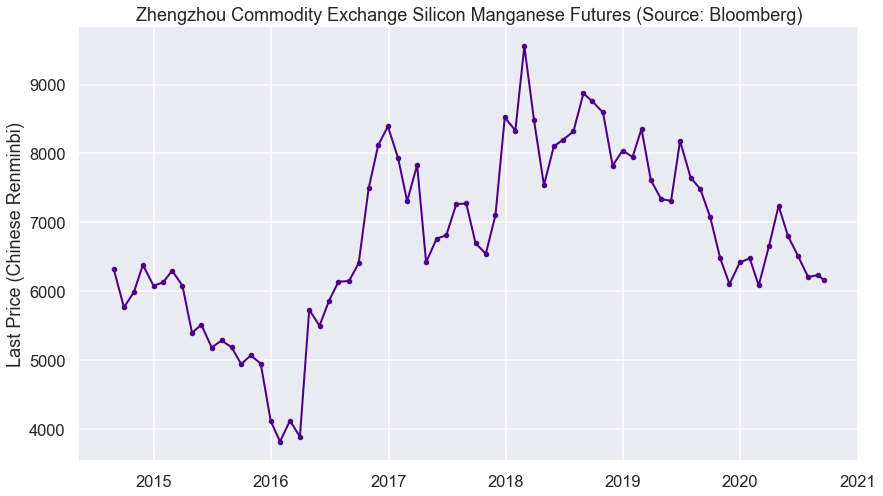

In [46]:
simn = pd.read_excel('vars_mn.xlsx', parse_dates=['Date'], sheet_name='SiMn')

sns.set_context("talk")
plt.plot(simn['Date'],simn['Last Price'], c='indigo', marker='.', linewidth=2)
plt.title('Zhengzhou Commodity Exchange Silicon Manganese Futures (Source: Bloomberg)')
plt.ylabel('Last Price (Chinese Renminbi)')

plt.show()

## (5) CNEVFERY Index (Ferroalloys' export volume)

As previously mentioned, ferroalloys and manganese are needed for steelmaking, which is why we considered it would share a similar pattern than manganese. We use the **China Export Commodity Volume - Ferroalloy** (**Source:** Bloomberg).

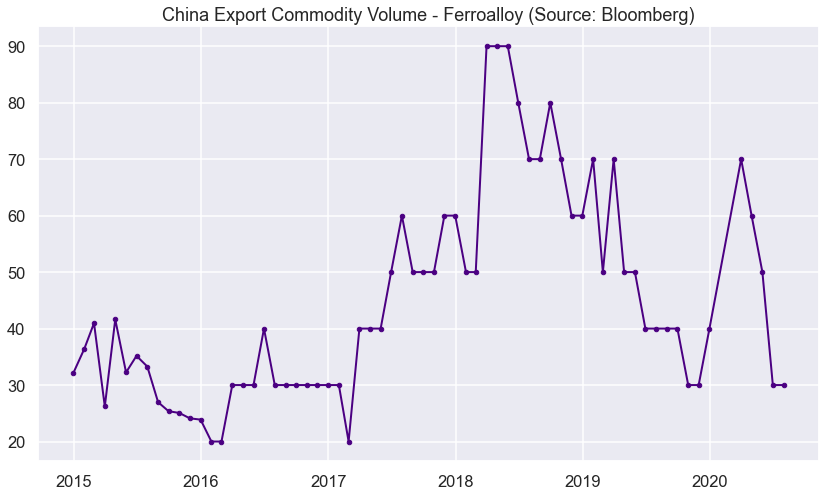

In [47]:
ferro = pd.read_excel('vars_mn.xlsx', parse_dates=['Date'], sheet_name='Fe')

sns.set_context("talk")
plt.plot(ferro['Date'],ferro['Last Price'], c='indigo', marker='.', linewidth=2)
plt.title('China Export Commodity Volume - Ferroalloy (Source: Bloomberg)')
# plt.ylabel('Last Price (Chinese Renminbi)')

plt.show()

## (6) USDCNH - United States and China

Besides having the USDMXN exchange, this one can be more influential to the price of manganese, because China is still consider the biggest producer of steel (requiring manganese) and the USD currency could represent the position of China against the global economy. Despite the producing power of China, it still shares certain problems when it comes to acquiring the right ingredients:

>The country is the world's largest steel producer and biggest iron ore consumer. Yet it lacks pricing power due to its reliance on imported iron ore for more than 70% of its needs.

**Source:** Bloomberg

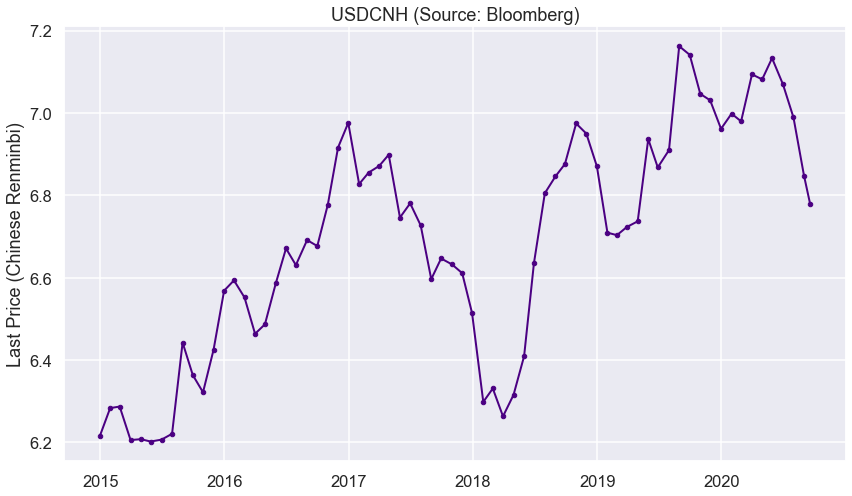

In [48]:
usdcnh = pd.read_excel('vars_mn.xlsx', parse_dates=['Date'], sheet_name='USDCNH')

sns.set_context("talk")
plt.plot(usdcnh['Date'],usdcnh['Last Price'], c='indigo', marker='.', linewidth=2)
plt.title('USDCNH (Source: Bloomberg)')
plt.ylabel('Last Price (Chinese Renminbi)')

plt.show()

## Relationship between sub-variables for `Mn`

The next step is to analyze the relationship between all sub-variables and filter the ones that are more statistically significat and explain better the movements of the average spot price of manganese. In order to do that, we proceed to put all data in a single dataframe and filtering data before 2020. Let's recall all data shares the same period and frequency, since we are seeking to have the highest amount of observations for the correlations and multinear regressions of ordinary least squares

In [49]:
# putting all sub-variblles together
dfs = pd.merge(mang_ix, steel_ix, on='Date')
dfs = pd.merge(dfs, ferro, on='Date')
dfs = pd.merge(dfs, simn, on='Date')
dfs = pd.merge(dfs, usdcnh, on='Date')

# renaming columns
dfs.columns = ['Date', 'Mn', 'St', 'Fe', 'SiMn', 'USDCNH']

# creating datatime format for date
dfs['Date'] = pd.to_datetime(dfs['Date'], format='%Y%m%d')

data = dfs.copy()

# filtering data before 2020
data = data.loc[data['Date']<'2020-01-01']
data_20 = dfs.loc[dfs['Date']>'2020-01-01']
data_20.head()

,Date,Mn,St,Fe,SiMn,USDCNH
43,2020-03-31,36.5,147054,70.0,6656,7.0939
44,2020-04-30,51.5,137098,60.0,7240,7.0817
45,2020-06-30,43.5,148295,30.0,6506,7.0699
46,2020-07-31,36.0,152694,30.0,6206,6.9892


## Correlation between predictors for `Mn`

The varible we are trying to predict in a sense is `Mn`, which is the Manganese Average Spot Price. The correlation it has with all the sub-variables is fairly good and as expected, the derivatives has a big influence in the spot price. We infer we have good sub-variables to interpret the predictor.

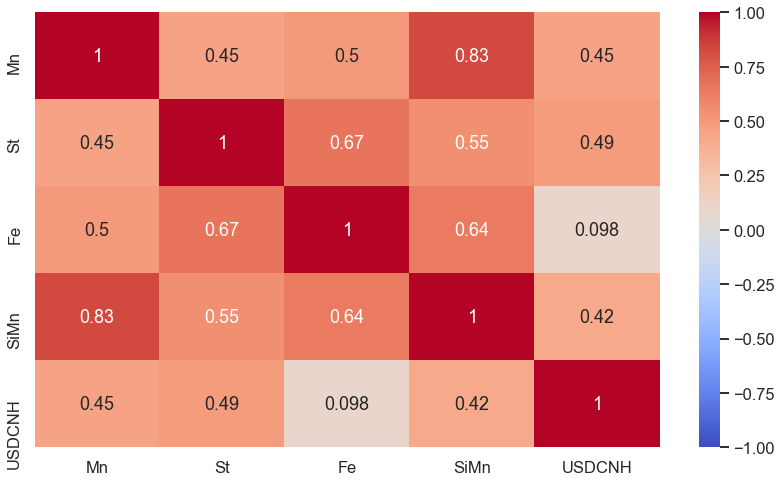

In [50]:
# create correlation
corr = data.corr()

# create heatmap based on correlation
sns.heatmap(corr, annot = True, vmin=-1, vmax=1, center= 0, cmap='coolwarm')
plt.show()

## Collinearity of every predictor for `Mn`

All sub-variables together are `VIF > 10`, which means that many of them will *fight* to explain the the predictor, now we know most of the sub-variables should not be considered in the end for the multinear regression model

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

data_vif = data.copy()
data_vif = data_vif.drop('Date', axis=1)

for i in range(len(data_vif.columns)):
    v = vif(np.matrix(data_vif),i)
    print("VIF for {}: {}".format(data_vif.columns[i],round(v,2)))

VIF for Mn: 25.39
VIF for St: 566.76
VIF for Fe: 21.45
VIF for SiMn: 112.69
VIF for USDCNH: 490.83


## Linear Regression for `MN`

The data of each sub-variables have different units and that makes them have very different variances, this means we must scale the data, steel production and silicon manganese futures more precisely. The relations that each variabe could have to the average spot price of manganese is the following:

1. **Silicon Manganese Futures:** Positive Relation, since it is a close future representation of the spot price
2. **Steel Production:** Positive Relation, producing more steel requires more manganese
3. **Ferroalloys Exports:** Positive Relation, ferroalloys and manganese share similar demand patterns because both are necessry for steelmaking
4. **USDCNH:** Positive Relation, when it comes to exporting and receving revenue as a result, for chinese companies, they receive more of their local currency per dollar

In [52]:
df = data.copy()

# we prepare the data for the model
df = df.drop('Date', axis=1)
display(df.head())
print(np.std(df))

,Mn,St,Fe,SiMn,USDCNH
0,31.35,133990,32.18,6080,6.2165
1,26.15,138002,26.21,6082,6.2059
2,22.65,135572,41.62,5396,6.2080
3,22.85,135660,35.17,5184,6.2069
4,22.75,131945,33.28,5286,6.2211


Mn          17.099088
St        9886.499497
Fe          17.491548
SiMn      1352.708192
USDCNH       0.255243
dtype: float64


In [53]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

df1 = df.copy()

# scale steel production data
float_array = df1['St'].values.reshape(-1, 1)
scaler = StandardScaler().fit(float_array)
scaler = scaler.transform(float_array)
df_st = pd.DataFrame(scaler)

# scale silicon manganese futures data
float_array = df1['SiMn'].values.reshape(-1, 1)
scaler = StandardScaler().fit(float_array)
scaler = scaler.transform(float_array)
df_simn = pd.DataFrame(scaler)

# scale ferroalloys exports data
float_array = df1['Fe'].values.reshape(-1, 1)
scaler = StandardScaler().fit(float_array)
scaler = scaler.transform(float_array)
df_fe = pd.DataFrame(scaler)

# scale usdcnh exports data
float_array = df1['USDCNH'].values.reshape(-1, 1)
scaler = StandardScaler().fit(float_array)
scaler = scaler.transform(float_array)
df_uc = pd.DataFrame(scaler)

# concat the new scaled data
df_s = pd.concat([df_st, df_simn],axis=1, ignore_index=True, sort=False)
df_s = pd.concat([df_s, df_fe], axis=1, ignore_index=True, sort=False)
df_s = pd.concat([df_s, df_uc], axis=1, ignore_index=True, sort=False)

# concat new data with previous data
df1 = pd.concat([df1, df_s], axis=1)
df1.columns = ['Mn', 'St', 'Fe', 'SiMn', 'USDCNH', 'St_s', 'SiMn_s', 'Fe_s', 'USDCNH_s']
display(df1.head())

,Mn,St,Fe,SiMn,USDCNH,St_s,SiMn_s,Fe_s,USDCNH_s
0,31.35,133990,32.18,6080,6.2165,-0.805512,-0.548839,-0.671487,-1.683821
1,26.15,138002,26.21,6082,6.2059,-0.399706,-0.547360,-1.012795,-1.725350
2,22.65,135572,41.62,5396,6.2080,-0.645496,-1.054491,-0.131798,-1.717123
3,22.85,135660,35.17,5184,6.2069,-0.636595,-1.211214,-0.500547,-1.721432
4,22.75,131945,33.28,5286,6.2211,-1.012360,-1.135809,-0.608600,-1.665799


## First  Multilinear Regression Model: `Fe` and `USDCNH`

Steel Production `St_s` could not be added because it is too cyclical and it has many influences beyond the value of its chemicals components, there are other factors such as the construction and automotive industry and the performance of the global economy or countries with a lot of influence.

This model used the Ferroalloys exports volume `Fe` which didn't require to be scaled when using `USDCNH` as the second independent variable which in the end wasn't used its scaled version either.

The model is accurante enough and the significance of the independent variables is good enough. The Chinese export volume of ferroalloy `Fe`, which is together with manganese an essential component for steelmaking and considering that both are mainly used for that purpose can explain the average spot price of manganese. The exchange of `USDCNH` is a very important element because it also dictates the revenue of China when performing those exports of ferroalloy.

In [54]:
# import required libraries
import statsmodels.api as sm
from sklearn.preprocessing import scale

features = ['Fe', 'USDCNH']

# prepare data
X = df1[features].values
y = df['Mn'].values.ravel()

# create model
reg = sm.OLS(y, X)
results = reg.fit()

# print results
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.911
Model:                            OLS   Adj. R-squared (uncentered):              0.907
Method:                 Least Squares   F-statistic:                              211.1
Date:                Sat, 26 Sep 2020   Prob (F-statistic):                    2.59e-22
Time:                        15:47:31   Log-Likelihood:                         -175.71
No. Observations:                  43   AIC:                                      355.4
Df Residuals:                      41   BIC:                                      358.9
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Second Multilinear Regression Model: `SiMn_s` and `USDCNH`

This model used the Scaled Silicon Manganese Futures `SiMn_s` and `USDCNH` as the second independent variable which in the end wasn't used its scaled version due to its already low variability. The model is accurante enough and the significance of the independent variables is good enough. 

It was expected that the future prices affect the spot price, besides the speculation of investors, because it is a commodity it is clearly linked to the physical state of the system: supply and demand, reserves, weather conditions, physical state of the manganese, etc. *(Botterud, Kristiansen & Ili, 2010)*. The exchange of `USDCNH` is a very important element because, even though the other varible no longer represents export volumes, thanks to the model we can confirm that the USD currency could represent the position of China against the global economy and the derivatives come from China.

>Once again, China becomes the main influence in the fate of Manganese and the Iron Ore industry in general

In [55]:
# import required libraries
import statsmodels.api as sm
from sklearn.preprocessing import scale

features = ['SiMn_s', 'USDCNH']

# prepare data
X = df1[features].values
y = df['Mn'].values.ravel()

# create model
reg = sm.OLS(y, X)
results = reg.fit()

# print results
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.961
Method:                 Least Squares   F-statistic:                              534.5
Date:                Sat, 26 Sep 2020   Prob (F-statistic):                    4.29e-30
Time:                        15:47:31   Log-Likelihood:                         -156.92
No. Observations:                  43   AIC:                                      317.8
Df Residuals:                      41   BIC:                                      321.4
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Average Manganese Spot Price 2020

$$ {Y_{Mn}} = \alpha + \beta_{1}({simn}_{1}) + \beta_{2}({usdcnh}_{2}) +  \epsilon $$

We will use one of the models we previously made and test it on FY20 data and get an average (applying a harmonic mean) of that spot price. The model will be number 2, which independent variables are the Scaled Silicon Manganese Futures **`SiMns`** and the exchange **`USDCNH`** to explain the Average Spot Price of Manganese **`Mn`**

### Average Manganese Spot Price: `$ 44.6 CNH`

In [69]:
# import required libraries
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import StandardScaler
from scipy import stats

# create data for model
df_test = data_20.copy()  

df_test = df_test.reset_index(drop=True)

float_array = df_test['SiMn'].values.reshape(-1, 1)

scaler = StandardScaler().fit(float_array)
scaler = scaler.transform(float_array)
scaler = pd.DataFrame(scaler, columns=['SiMn_s'])

X_test = pd.concat([df_test, scaler], axis=1)
X_test = X_test.loc[:,['USDCNH', 'SiMn_s']]

X_train = df1.loc[:,['USDCNH', 'SiMn_s']].values
Y_train = df1['Mn'].values.ravel()

# create model
reg = LinearRegression()
reg.fit(X_train,Y_train)
y_pred = reg.predict(X_test)

print('Predicted Spot Price of Manganese FY20:\n{}\n'.format(y_pred))
print('Predicted Average Spot Price FY20: {}'.format(stats.gmean(y_pred)))

Predicted Spot Price of Manganese FY20:
[49.06203051 69.70396402 43.53974231 32.22952476]

Predicted Average Spot Price FY20: 46.80429282326298


## Average Manganese Spot Price Forecast (2020-2025)

Based on the model and applying the best independent variables that explained the average spot price of manganese we obtain the following results:

### Predicted Manganese Price: `$ 46.80429282 CNH`
### Sales FY20: `$ 315.904355 million US` 

Even though we considered this final prediction to be quite precise, we considered that the model, as previously stated, doesn't consider the entire spectrum of the economic slowdown. We must apply some modification for FY20 based on the following:

* The team esults just follow the tendency based on the price of manganese but it is not affected by the clear economic slowdown that will continue for a few more months (even years). 
* It is important to mention a huge advantage and it is the fact that this economic slowdown wasn't caused by a financial crisis or something related to it, it was entirely an extraordinary situation which affected the economy as a consequence. This explains why the recvoery has showed fast results. Despite this, this process of recovery could take a couple more years

> High frequency data that tracks economic activity show a slowdown in the recovery from the hegith of the lockdowns

**Source:** Bloomberg

Furthermore, The Sales divisions play an essetial job here
* Manganese: most of its drivers are at a macroeconomic level, because of that, the COVID-19 affects it in a negative way
* Precious Metals (Gold): most of its drivers are also macroeconomic, but it reacts the other way around since it is anticyclal as it was previously mentioned
* As a result, manganese sales show a decrease while there are succesful sales in gold. 
* By they way, we must consider that 83% of Autlán's operations represent the extraction of Manganese, this proportions might be widely affected since manganese and gold act in different directions against economic performance 
* Despite the anticyclical effect of gold, that doesn't apply in this case because the ALL mines were closed temporarily (April and June) and then it followed a low demand of both Manganese and Gold, this is a very particular situation that couldn't be fit in the model but the team proposes the following: diminish sales 1/6, that could represent the complete unproduction of Autlán during those two months of temporal inactivity and the low demand which still persists to this day

$$ $ 315.9 * 0.75 = $ 236.93 $$

### Predicted Manganese Price: `$ 46.80429282 CNH`
### Sales FY20: `$ 236.93 million US` 

In [72]:
# import required libraries
from sklearn.linear_model import LinearRegression 

# create data for model
Y_train = pd.read_excel('vars_mn.xlsx', sheet_name='Manganese Sales', usecols=['Mn Sales']).values
X_train = pd.read_excel('vars_mn.xlsx', sheet_name='Manganese_Y', usecols=['Mid Price'])
X_train = X_train.values
X_test = np.array([46.80429282326298]).reshape(-1, 1)

print('Predicted Manganese Price: {}'.format(X_test))

# create model
reg = LinearRegression()
reg.fit(X_train,Y_train)
y_pred = reg.predict(X_test)
print('Sales FY20: {}'.format(y_pred))

Predicted Manganese Price: [[46.80429282]]
Sales FY20: [[315.904355]]


## Quantitative conclusions

`China` is one of the most important factors not only for `Manganese Spot Price`, but also its export volume and the fate of the iron ore industry which affects directly steelmaking because of the required components for the process (among these, manganese and ferroalloy). China accounts for roughly 61% of the World's Manganese consumption (Source: Bloomberg). China is a big deal when it comes to `Mn`. `Chinese Silicomanganese Futures` share a rational correlation with `Manganese Spot Price` due to (besides speculation) its physical state. Furthermore, `Chinese Ferroalloys` share a similar demand and importance for steelmaking as manganese, especially when it comes to export volume. Last but not least, comparing Chinese `CNH` with `USD` display China's position in the global economy.

---

## References:

Gulley, A., &amp; Tilton, J. (2014, May 27). The relationship between spot and futures prices: An empirical analysis. Retrieved September 24, 2020, from https://www.sciencedirect.com/science/article/abs/pii/S0301420714000294

Botterud, A., Kristiansen, T., &amp; Ilic, M. (2009, December 01). The relationship between spot and futures prices in the Nord Pool electricity market. Retrieved September 24, 2020, from https://www.sciencedirect.com/science/article/pii/S0140988309002278s clearly linked to the physical state of the system, such as hydro inflow, reservoir levels, and demand.

* All Bloomberg News
* Flash Reports

**Other sources and data came from Bloomberg Terminal**